In [2]:
import pandas as pd

path='./data1/credit_card_fraud_imbalanced.csv'
df = pd.read_csv(path)

In [35]:
df.head(3)

,TransactionID,CustomerID,Amount,MerchantID,TransactionType,Location,TransactionDate,CardType,DeviceType,IP_Address,AuthenticationMethod,PreviousFraudulentTransaction,Fraud
0,a00d7cac-9b6e-409d-8cdb-812a49b71679,c19a2469,2686.37,ac2bb7,ATM,Los Angeles,2025-02-25 07:18:14,Credit,Mobile,22.55.89.243,PIN,0,0
1,bf17fe98-c9b1-4fc3-bbb0-a549726ecb94,2b079545,3112.02,662f83,POS,Tokyo,2025-01-03 11:36:34,Credit,Mobile,58.16.27.183,OTP,0,1
2,fe1a51ef-cc32-43f5-9277-67407e0f8ab8,af7a46cd,4398.03,30fcae,Transfer,Los Angeles,2025-02-12 10:48:08,Debit,Mobile,106.140.42.53,OTP,0,0


In [37]:
df.drop(columns=['TransactionID'],inplace=True)

In [38]:
required_feature = ['TransactionID','CustomerID','Amount','MerchantID','TransactionType','Location','TransactionDate','CardType','DeviceType','IP_Address','AuthenticationMethod','PreviousFraudulentTransaction','Fraud']
df1 = pd.read_csv(path,usecols = required_feature)

In [39]:
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])

In [40]:
df1['TransactionYear'] = df1['TransactionDate'].dt.year
df1['TransactionMonth'] = df1['TransactionDate'].dt.month
df1['Transactionday'] = df1['TransactionDate'].dt.day
df1['TransactionWeekday'] = df1['TransactionDate'].dt.weekday
df1['weekend'] = (df1['TransactionWeekday'] >= 5).astype(int)
df1['TransactionHour'] = df1['TransactionDate'].dt.hour
df1['TransactionMinute'] = df1['TransactionDate'].dt.minute

In [41]:
cols = ['Amount','TransactionType','Location','CardType','DeviceType','AuthenticationMethod','PreviousFraudulentTransaction']
df1.drop(columns=['TransactionDate',],inplace=True)

In [42]:
df1['Frequency'] = df1.groupby('TransactionID')['TransactionHour'].transform('count')


In [43]:
df1.head()

,TransactionID,CustomerID,Amount,MerchantID,TransactionType,Location,CardType,DeviceType,IP_Address,AuthenticationMethod,PreviousFraudulentTransaction,Fraud,TransactionYear,TransactionMonth,Transactionday,TransactionWeekday,weekend,TransactionHour,TransactionMinute,Frequency
0,a00d7cac-9b6e-409d-8cdb-812a49b71679,c19a2469,2686.37,ac2bb7,ATM,Los Angeles,Credit,Mobile,22.55.89.243,PIN,0,0,2025,2,25,1,0,7,18,1
1,bf17fe98-c9b1-4fc3-bbb0-a549726ecb94,2b079545,3112.02,662f83,POS,Tokyo,Credit,Mobile,58.16.27.183,OTP,0,1,2025,1,3,4,0,11,36,3
2,fe1a51ef-cc32-43f5-9277-67407e0f8ab8,af7a46cd,4398.03,30fcae,Transfer,Los Angeles,Debit,Mobile,106.140.42.53,OTP,0,0,2025,2,12,2,0,10,48,1
3,25d73223-a634-4b4f-8b08-e1eec2409339,6760738f,4997.76,7ed42e,POS,Berlin,Prepaid,Desktop,83.139.56.34,Biometric,1,1,2025,2,5,2,0,2,29,3
4,fab71a61-ca49-43e2-a5ef-be47689b7dc7,c6bc6bd3,88.46,c41843,ATM,Tokyo,Prepaid,POS Terminal,199.25.128.201,PIN,0,0,2025,1,11,5,1,23,4,1


Text(0, 0.5, '')

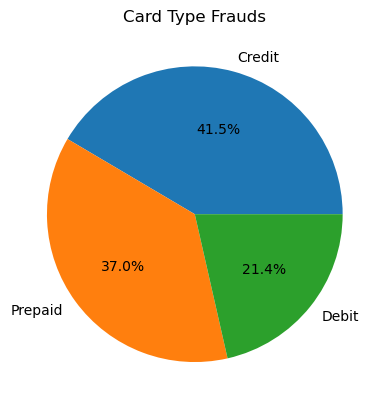

In [44]:
import matplotlib.pyplot as plt

df1['CardType'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Card Type Frauds")
plt.ylabel("")

Text(0, 0.5, '')

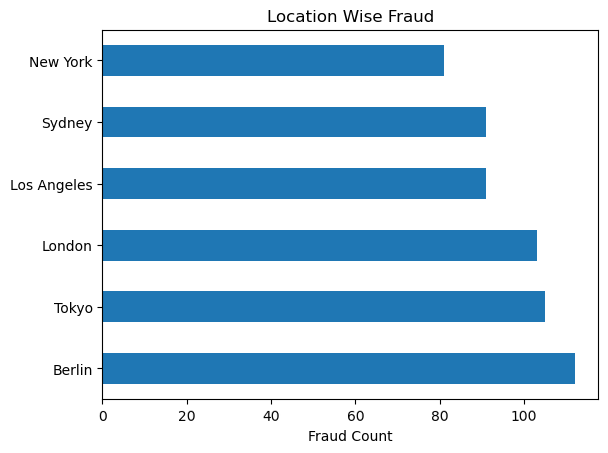

In [45]:
df1["Location"].value_counts().plot(kind='barh')
plt.title('Location Wise Fraud')
plt.xticks(rotation=1)
plt.xlabel('Fraud Count')
plt.ylabel('')

Text(0, 0.5, 'Total Fraud')

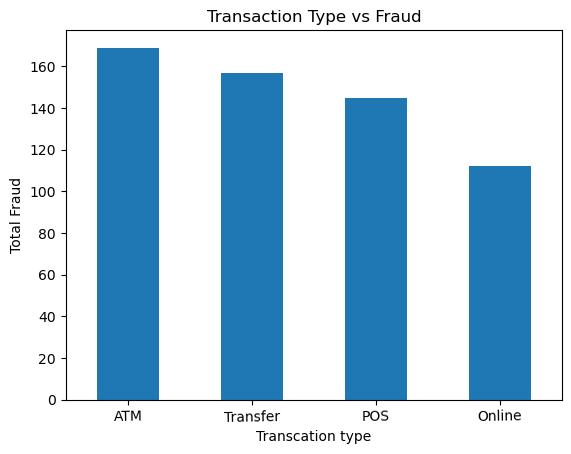

In [46]:
df1["TransactionType"].value_counts().plot(kind='bar')
plt.title('Transaction Type vs Fraud')
plt.xticks(rotation=1)
plt.xlabel('Transcation type')
plt.ylabel('Total Fraud')

Text(0, 0.5, 'Hour')

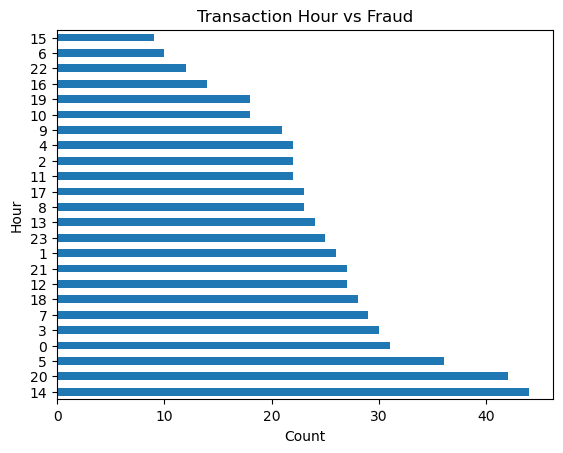

In [47]:
df1["TransactionHour"].value_counts().plot(kind='barh')
plt.title('Transaction Hour vs Fraud')
plt.xticks(rotation=1)
plt.xlabel('Count')
plt.ylabel('Hour')

In [48]:
df1.drop(columns=['TransactionID','CustomerID','TransactionYear'],inplace=True)
df1.drop(columns = ['IP_Address'],inplace = True)

In [49]:
df1

,Amount,MerchantID,TransactionType,Location,CardType,DeviceType,AuthenticationMethod,PreviousFraudulentTransaction,Fraud,TransactionMonth,Transactionday,TransactionWeekday,weekend,TransactionHour,TransactionMinute,Frequency
0,2686.37,ac2bb7,ATM,Los Angeles,Credit,Mobile,PIN,0,0,2,25,1,0,7,18,1
1,3112.02,662f83,POS,Tokyo,Credit,Mobile,OTP,0,1,1,3,4,0,11,36,3
2,4398.03,30fcae,Transfer,Los Angeles,Debit,Mobile,OTP,0,0,2,12,2,0,10,48,1
3,4997.76,7ed42e,POS,Berlin,Prepaid,Desktop,Biometric,1,1,2,5,2,0,2,29,3
4,88.46,c41843,ATM,Tokyo,Prepaid,POS Terminal,PIN,0,0,1,11,5,1,23,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2372.88,037b7f,Transfer,Berlin,Credit,Desktop,OTP,0,0,2,20,3,0,20,42,1
579,3960.27,4acceb,Transfer,Berlin,Prepaid,Desktop,PIN,0,0,2,3,0,0,20,50,1
580,1911.56,f4072a,POS,Berlin,Credit,Mobile,PIN,0,0,2,26,2,0,14,59,1
581,4757.49,f006ca,ATM,Los Angeles,Prepaid,POS Terminal,Biometric,0,1,2,25,1,0,21,48,4


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LogisticRegression ==> LogisticRegression has less accuracy score

preprocessing = ColumnTransformer(
    transformers = [
        ('number_col','passthrough',[feature for feature in cols if df1[feature].dtype in ['int64','float64']]),
        ('string_col', OneHotEncoder(handle_unknown='ignore'), [feature for feature in cols if df1[feature].dtype == 'object'])

    ]
)

model = Pipeline(
    steps = [
        ('process',preprocessing),
        ('regressor',RandomForestClassifier(n_estimators=50,random_state=42))
    ]
)


X = df1.drop(columns=['Fraud'])
y = df1['Fraud']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
model.fit(X_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('number_col', 'passthrough',
                                                  ['Amount',
                                                   'PreviousFraudulentTransaction']),
                                                 ('string_col',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['TransactionType',
                                                   'Location', 'CardType',
                                                   'DeviceType',
                                                   'AuthenticationMethod'])])),
                ('regressor',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [51]:
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error,confusion_matrix,f1_score,roc_auc_score,precision_recall_fscore_support,precision_recall_curve

y_pred = model.predict(X_test)

print("Model Performance \n ")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("MAE:", round(mean_absolute_error(y_test, y_pred),4))
print("roc_auc_score : ",round (roc_auc_score(y_test,y_pred),4))
print("F1 SCORE : ",round(f1_score(y_test,y_pred),4))

Model Performance 
 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       161
           1       0.93      0.97      0.95        73

    accuracy                           0.97       234
   macro avg       0.96      0.97      0.97       234
weighted avg       0.97      0.97      0.97       234

[[156   5]
 [  2  71]]
Accuracy: 0.9701
MAE: 0.0299
roc_auc_score :  0.9708
F1 SCORE :  0.953


In [ ]:
#Unsupervised

In [18]:
Udf = df1.copy()
Udf1 = df1.copy()

In [19]:
from sklearn.cluster import DBSCAN,KMeans 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for feature in ['TransactionType','Location','CardType','DeviceType','AuthenticationMethod','MerchantID']:
    Udf[feature] = encoder.fit_transform(Udf[feature])


In [20]:
Udf.head()

,Amount,MerchantID,TransactionType,Location,CardType,DeviceType,AuthenticationMethod,PreviousFraudulentTransaction,Fraud,TransactionMonth,Transactionday,TransactionWeekday,weekend,TransactionHour,TransactionMinute
0,2686.37,304,0,2,0,1,2,0,0,2,25,1,0,7,18
1,3112.02,174,2,5,0,1,1,0,1,1,3,4,0,11,36
2,4398.03,79,3,2,1,1,1,0,0,2,12,2,0,10,48
3,4997.76,216,2,0,2,0,0,1,1,2,5,2,0,2,29
4,88.46,337,0,5,2,2,2,0,0,1,11,5,1,23,4


In [21]:
from sklearn.preprocessing import StandardScaler

X=Udf

scale = StandardScaler()
X_Scaled = scale.fit_transform(X)
X_scaled_df = pd.DataFrame(X_Scaled)


In [22]:
dbs = DBSCAN(eps=0.5, min_samples=5)
Udf['Cluster'] = dbs.fit_predict(X_scaled_df)

In [23]:
from sklearn.ensemble import IsolationForest

Usmodel = IsolationForest(contamination=0.03, random_state=42)

Udf['Anomaly'] = Usmodel.fit_predict(X_scaled_df)
Udf['Anomaly'] = Udf['Anomaly'].map({1:"Normal",-1:"Anomaly"})

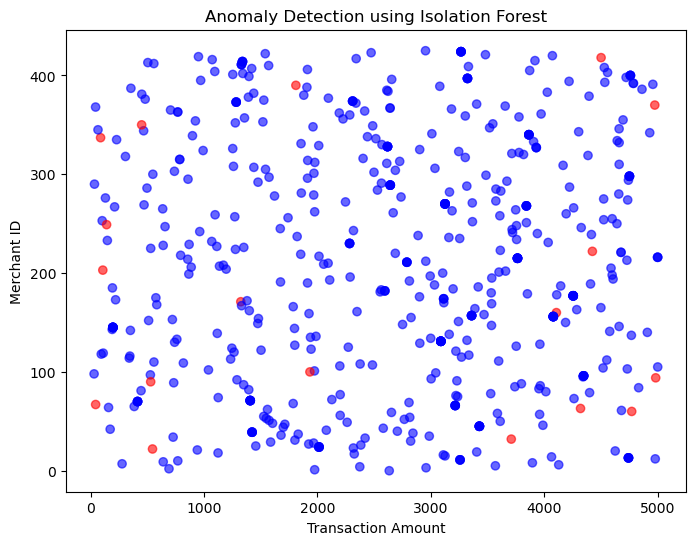

In [24]:
plt.figure(figsize=(8,6))
colors = {'Normal': 'blue', 'Anomaly': 'red'}
plt.scatter(Udf['Amount'],Udf['MerchantID'], c=Udf['Anomaly'].map(colors), alpha=0.6)
plt.xlabel("Transaction Amount")
plt.ylabel("Merchant ID")
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

In [25]:
#ELBOW METHOD is used to find the best n_cluster value for KMeans

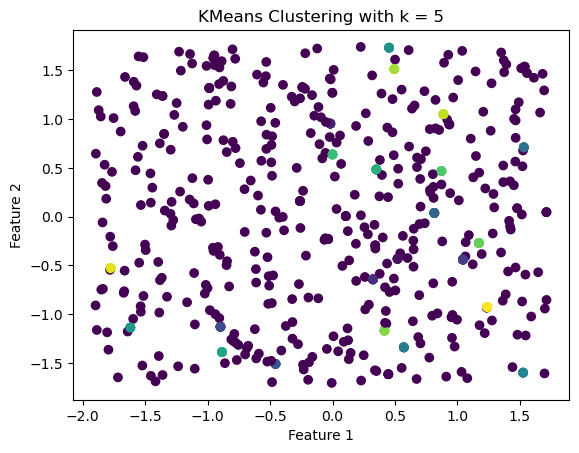

In [26]:
plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], c=Udf['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with k = {}'.format(5))
plt.show()

In [27]:
Udf1['ClusterID'] = Udf['Cluster']
Udf1['Anomaly'] = Udf['Anomaly'].map({'Normal': 0, 'Anomaly': 1})


In [28]:
for feature in ['TransactionType','Location','CardType','DeviceType','AuthenticationMethod','MerchantID']:
    Udf1[feature] = encoder.fit_transform(Udf1[feature])

In [29]:
X = Udf1.drop(columns=['Fraud'])
y=Udf1['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error,confusion_matrix

y_pred = model.predict(X_test)

print("Model Performance \n ")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("MAE:", round(mean_absolute_error(y_test, y_pred),4))

Model Performance 
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.97      0.99        73

    accuracy                           0.99       234
   macro avg       0.99      0.99      0.99       234
weighted avg       0.99      0.99      0.99       234

[[161   0]
 [  2  71]]
Accuracy: 0.9915
MAE: 0.0085


In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.994857058650162
